In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Exploratory Data Analysis

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Data Preprocessing

In [ ]:
df['Age'] = 2021 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [ ]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Past_Owners'}, inplace=True)

In [ ]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

Visualizing the data

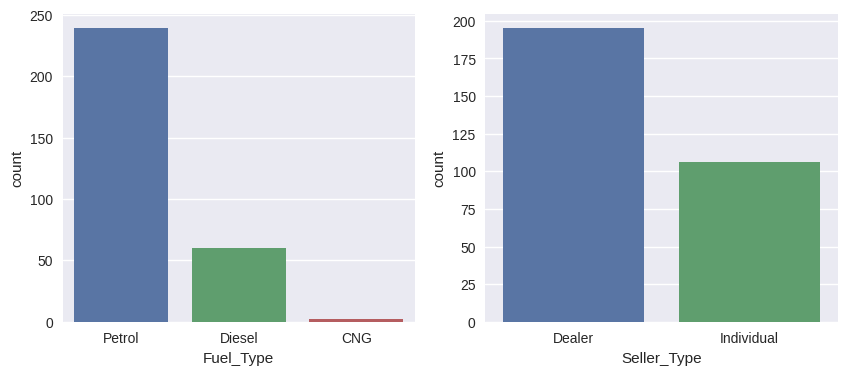

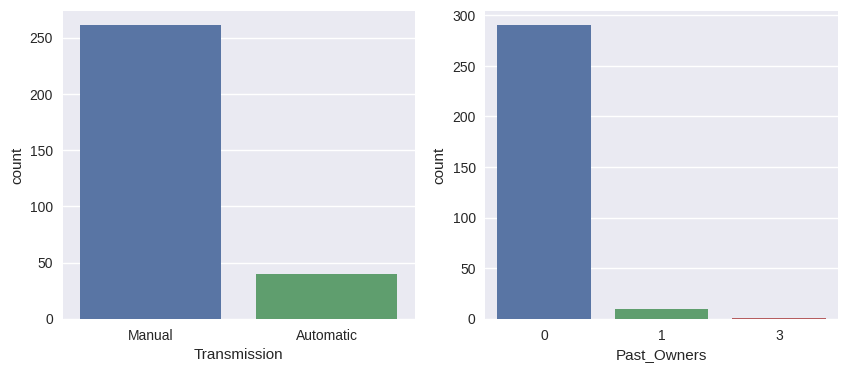

In [ ]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i +=1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

In [ ]:
df[df['Present_Price(lacs)']>df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [ ]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [ ]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


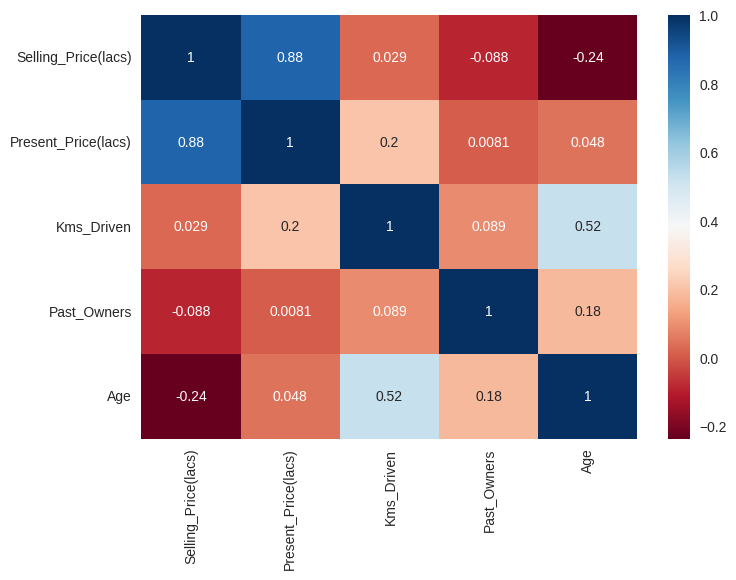

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.show()

In [ ]:
df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [ ]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [ ]:
# Creating dummies for categorical values
df.drop(labels='Car_Name', axis=1, inplace = True)

In [ ]:
df.head()


,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df = pd.get_dummies(data=df, drop_first=True)

In [ ]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Train - Test - Split

In [ ]:
# Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [ ]:
print(X)

[[5.5900e+00 2.7000e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [9.5400e+00 4.3000e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [9.8500e+00 6.9000e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [1.1000e+01 8.7934e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [1.2500e+01 9.0000e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.9000e+00 5.4640e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]]


In [ ]:
print(X.shape, y.shape)

(301, 8) (301, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

Scaling the data for better training

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(301, 1) (240, 1) (61, 1)


Building Artifical Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # O/P

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 46.3287 - val_loss: 38.2040
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 43.8316 - val_loss: 36.3621
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 41.9447 - val_loss: 34.6689
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 40.1506 - val_loss: 33.1182
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 38.4104 - val_loss: 31.7605
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 36.7176 - val_loss: 30.2999
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 34.9270 - val_loss: 28.7137
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 33.0787 - val_loss: 27.1583
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 31.0933 - val_loss: 25.0469
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 28.7794 - val_loss: 23.0973
Epoch 11

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

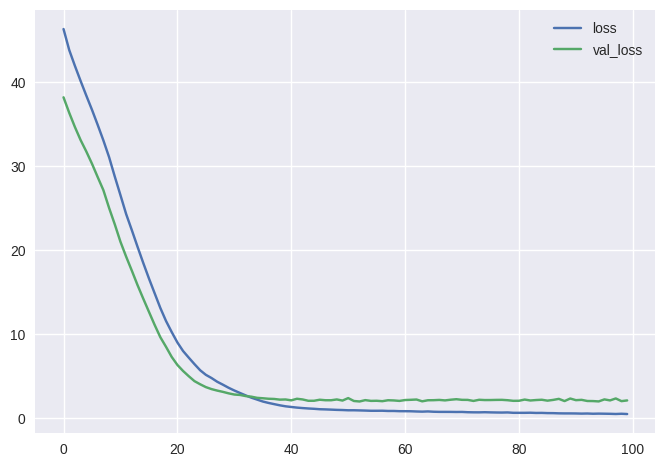

In [ ]:
loss_df.plot()

Model Evaluation

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.1408


2.1407997608184814

model.predict() on X_test

In [ ]:
train_pred = model.predict(X_train)
# print(pred_train)

8/8 [==============================] - 0s 2ms/step


model.predict() on X_train

In [ ]:
test_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_train = r2_score(y_train, train_pred)
print("R Squared value of train dataL: ",r2_train)

R Squared value of train dataL:  0.9807275761464355


In [ ]:
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: 0.9013191820023678


In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_pred)
accuracy_train = 1 - mse_train / y_train.var()

mse_test = mean_squared_error(y_test, test_pred)
accuracy_test = 1 - mse_test / y_test.var()

print("Accuracy on training set:", accuracy_train)
print("Accuracy on testing set:", accuracy_test)




Accuracy on training set: 0.9807275761464355
Accuracy on testing set: 0.9013191820023678


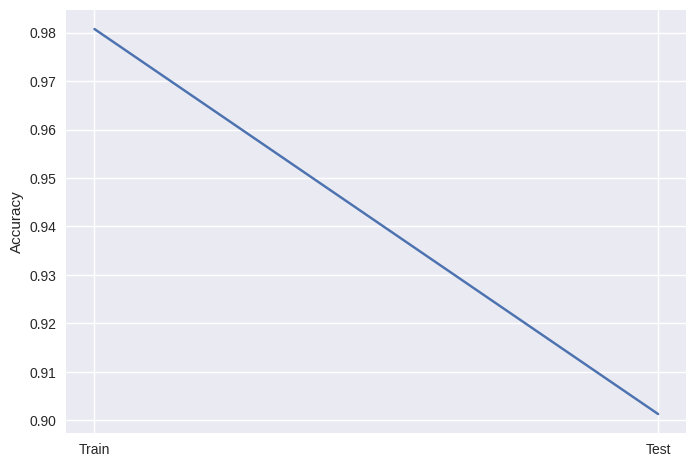

In [ ]:
import matplotlib.pyplot as plt

plt.plot([accuracy_train, accuracy_test])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('Accuracy')
plt.show()
